### Notebook for the epithelial label transfer of Reference epithelial dataset to rest of epithelial cells from GCA using `scANVI`

- **Developed by:** Anna Maguza
- **Institute of Computational Biology - Computational Health Department - Helmholtz Munich**
- 17th February 2022

### Import required modules

In [1]:
import scvi
import anndata
import warnings
import numpy as np
import scanpy as sc
import pandas as pd
import matplotlib.pyplot as plt

Global seed set to 0
/home/icb/anna.maguza/miniconda3/envs/scvi_env/lib/python3.9/site-packages/pytorch_lightning/utilities/warnings.py:53: LightningDeprecationWarning: pytorch_lightning.utilities.warnings.rank_zero_deprecation has been deprecated in v1.6 and will be removed in v1.8. Use the equivalent function from the pytorch_lightning.utilities.rank_zero module instead.
  new_rank_zero_deprecation(
/home/icb/anna.maguza/miniconda3/envs/scvi_env/lib/python3.9/site-packages/pytorch_lightning/utilities/warnings.py:58: LightningDeprecationWarning: The `pytorch_lightning.loggers.base.rank_zero_experiment` is deprecated in v1.7 and will be removed in v1.9. Please use `pytorch_lightning.loggers.logger.rank_zero_experiment` instead.
  return new_rank_zero_deprecation(*args, **kwargs)


### Set up working environment

In [2]:
%matplotlib inline

In [3]:
sc.settings.verbosity = 3
sc.logging.print_versions()
sc.settings.set_figure_params(dpi = 180, color_map = 'magma_r', dpi_save = 300, vector_friendly = True, format = 'svg')

-----
anndata     0.8.0
scanpy      1.9.1
-----
PIL                 9.2.0
absl                NA
asttokens           NA
attr                22.1.0
backcall            0.2.0
beta_ufunc          NA
binom_ufunc         NA
bottleneck          1.3.5
brotli              NA
certifi             2022.09.24
cffi                1.15.1
charset_normalizer  2.1.1
chex                0.1.5
contextlib2         NA
cycler              0.10.0
cython_runtime      NA
dateutil            2.8.2
debugpy             1.6.3
decorator           5.1.1
defusedxml          0.7.1
deprecate           0.3.2
docrep              0.3.2
entrypoints         0.4
executing           1.2.0
flax                0.6.2
fsspec              2022.11.0
google              NA
h5py                3.7.0
hypergeom_ufunc     NA
idna                3.4
ipykernel           6.17.1
ipython_genutils    0.2.0
ipywidgets          8.0.2
jax                 0.3.25
jaxlib              0.3.25
jedi                0.18.2
joblib              1.2.0
jupyt

In [4]:
warnings.simplefilter(action = 'ignore')
scvi.settings.seed = 1712
%config InlineBackend.print_figure_kwargs = {'facecolor' : "w"}
%config InlineBackend.figure_format = 'retina'

Global seed set to 1712


In [4]:
arches_params = dict(
    use_layer_norm = "both",
    use_batch_norm = "none",
    encode_covariates = True,
    dropout_rate = 0.2,
    n_layers = 2,
)

### Read in Reference object

In [6]:
reference_input = '/lustre/groups/talaveralopez/workspace/anna.maguza/Processed_datasets/expi_map/Epithelial_reference_map_subset_after_geosketch.h5ad'
reference_output = '/lustre/groups/talaveralopez/workspace/anna.maguza/Processed_datasets/expi_map/Epithelial_reference_map_subset_after_geosketch_output.h5ad'

In [7]:
reference = sc.read_h5ad(reference_input)
reference.X

<68261x40144 sparse matrix of type '<class 'numpy.float32'>'
	with 156100043 stored elements in Compressed Sparse Row format>

In [8]:
reference.obs

UniqueCell_ID  \
cell_id                                                                  
AACACGTTCTTGCATT_Ileum-1_Stem Cell  AACACGTTCTTGCATT_Ileum-1_Stem Cell   
AACCGCGCATGAAGTA_Ileum-1_Stem Cell  AACCGCGCATGAAGTA_Ileum-1_Stem Cell   
AACTCAGAGCGATCCC_Ileum-1_Stem Cell  AACTCAGAGCGATCCC_Ileum-1_Stem Cell   
AACTCCCTCTCAACTT_Ileum-1_Stem Cell  AACTCCCTCTCAACTT_Ileum-1_Stem Cell   
AACTCTTAGCTTCGCG_Ileum-1_Stem Cell  AACTCTTAGCTTCGCG_Ileum-1_Stem Cell   
...                                                                ...   
GGCGTGTGTGTTGAGG-1-4918STDY7718977                                 nan   
GTATTCTAGGACACCA-1-4918STDY7718977                                 nan   
TCAACGAGTTCGCTAA-1-4918STDY7718977                                 nan   
TCGCGTTTCTGGTTCC-1-4918STDY7718977                                 nan   
TGGTTCCAGATGGGTC-1-4918STDY7718977                                 nan   

                                   Sample_ID    CellType      Study_name  \
cell_id                                                                    
AACACGTTCTTGCATT_Ileum-1_Stem Cell   Ileum-1   Stem Cell            Wang   
AACCGCGCATGAAGTA_Ileum-1_Stem Cell   Ileum-1   Stem Cell            Wang   
AACTCAGAGCGATCCC_Ileum-1_Stem Cell   Ileum-1   Stem Cell            Wang   
AACTCCCTCTCAACTT_Ileum-1_Stem Cell   Ileum-1   Stem Cell            Wang   
AACTCTTAGCTTCGCG_Ileum-1_Stem Cell   Ileum-1   Stem Cell            Wang   
...                                      ...         ...             ...   
GGCGTGTGTGTTGAGG-1-4918STDY7718977       nan  Epithelial  Gut Cell Atlas   
GTATTCTAGGACACCA-1-4918STDY7718977       nan  Epithelial  Gut Cell Atlas   
TCAACGAGTTCGCTAA-1-4918STDY7718977       nan  Epithelial  Gut Cell Atlas   
TCGCGTTTCTGGTTCC-1-4918STDY7718977       nan  Epithelial  Gut Cell Atlas   
TGGTTCCAGATGGGTC-1-4918STDY7718977       nan  Epithelial  Gut Cell Atlas   

                                        Diagnosis   Age Region code  \
cell_id                                                               
AACACGTTCTTGCATT_Ileum-1_Stem Cell  Healthy adult   nan         nan   
AACCGCGCATGAAGTA_Ileum-1_Stem Cell  Healthy adult   nan         nan   
AACTCAGAGCGATCCC_Ileum-1_Stem Cell  Healthy adult   nan         nan   
AACTCCCTCTCAACTT_Ileum-1_Stem Cell  Healthy adult   nan         nan   
AACTCTTAGCTTCGCG_Ileum-1_Stem Cell  Healthy adult   nan         nan   
...                                           ...   ...         ...   
GGCGTGTGTGTTGAGG-1-4918STDY7718977          fetal  10Wk         FLI   
GTATTCTAGGACACCA-1-4918STDY7718977          fetal  10Wk         FLI   
TCAACGAGTTCGCTAA-1-4918STDY7718977          fetal  10Wk         FLI   
TCGCGTTTCTGGTTCC-1-4918STDY7718977          fetal  10Wk         FLI   
TGGTTCCAGATGGGTC-1-4918STDY7718977          fetal  10Wk         FLI   

                                     Fraction Gender  10X  ...  \
cell_id                                                    ...   
AACACGTTCTTGCATT_Ileum-1_Stem Cell        nan    nan  nan  ...   
AACCGCGCATGAAGTA_Ileum-1_Stem Cell        nan    nan  nan  ...   
AACTCAGAGCGATCCC_Ileum-1_Stem Cell        nan    nan  nan  ...   
AACTCCCTCTCAACTT_Ileum-1_Stem Cell        nan    nan  nan  ...   
AACTCTTAGCTTCGCG_Ileum-1_Stem Cell        nan    nan  nan  ...   
...                                       ...    ...  ...  ...   
GGCGTGTGTGTTGAGG-1-4918STDY7718977  SC-EPCAMP      M   3'  ...   
GTATTCTAGGACACCA-1-4918STDY7718977  SC-EPCAMP      M   3'  ...   
TCAACGAGTTCGCTAA-1-4918STDY7718977  SC-EPCAMP      M   3'  ...   
TCGCGTTTCTGGTTCC-1-4918STDY7718977  SC-EPCAMP      M   3'  ...   
TGGTTCCAGATGGGTC-1-4918STDY7718977  SC-EPCAMP      M   3'  ...   

                                          doublet_scores predicted_doublets  \
cell_id                                                                       
AACACGTTCTTGCATT_Ileum-1_Stem Cell                   nan                nan   
AACCGCGCATGAAGTA_Ileum-1_Stem Cell                   nan                nan   
AACTCA

In [9]:
reference.obs['seed_labels'] = reference.obs['Integrated_05'].copy()

### Read query object

In [10]:
query_input = '/lustre/groups/talaveralopez/workspace/anna.maguza/Processed_datasets/expi_map/Epithelial_query_map_after_geosketch.h5ad'
query_output = '/lustre/groups/talaveralopez/workspace/anna.maguza/Processed_datasets/expi_map/Epithelial_query_map_after_geosketch_output.h5ad'

In [11]:
query = sc.read_h5ad(query_input)
query.X

<64174x40144 sparse matrix of type '<class 'numpy.float32'>'
	with 73994068 stored elements in Compressed Sparse Row format>

In [12]:
query.obs['seed_labels'] = 'Unknown'

In [13]:
# Concatenate reference and query
adata = reference.concatenate(query, batch_key = 'dataset', batch_categories = ['reference', 'query'])

### Select HVGs

In [14]:
adata_raw = adata.copy()
adata.layers['counts'] = adata.X.copy()

### Transfer of annotation with scANVI

In [15]:
scvi.model.SCVI.setup_anndata(adata, batch_key = 'Sample_ID', labels_key = "seed_labels", layer = 'counts')

In [16]:
scvi_model = scvi.model.SCVI(adata, n_latent = 50, n_layers = 3, dispersion = 'gene-batch', gene_likelihood = 'nb')

In [17]:
scvi_model.train(100)

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 100/100: 100%|██| 100/100 [40:35<00:00, 24.31s/it, loss=4.98e+03, v_num=1]

`Trainer.fit` stopped: `max_epochs=100` reached.


Epoch 100/100: 100%|██| 100/100 [40:35<00:00, 24.35s/it, loss=4.98e+03, v_num=1]


### Label transfer with `scANVI` 

In [18]:
scanvi_model = scvi.model.SCANVI.from_scvi_model(scvi_model, 'Unknown')

In [19]:
scanvi_model.train(25)

INFO     Training for 25 epochs.                                                                                   


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 25/25: 100%|██████| 25/25 [19:36<00:00, 47.00s/it, loss=4.98e+03, v_num=1]

`Trainer.fit` stopped: `max_epochs=25` reached.


Epoch 25/25: 100%|██████| 25/25 [19:36<00:00, 47.08s/it, loss=4.98e+03, v_num=1]


In [20]:
adata.obs["C_scANVI"] = scanvi_model.predict(adata)

- Extract latent representation

In [21]:
adata.obsm["X_scANVI"] = scanvi_model.get_latent_representation(adata)

- Visualise corrected dataset

In [22]:
sc.pp.neighbors(adata, use_rep = "X_scANVI", n_neighbors = 50, metric = 'minkowski')
sc.tl.umap(adata, min_dist = 0.2, spread = 2, random_state = 1712)

computing neighbors
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:01:02)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:04:12)


In [23]:
adata.obs

UniqueCell_ID  \
cell_id                                                                            
AACACGTTCTTGCATT_Ileum-1_Stem Cell-reference  AACACGTTCTTGCATT_Ileum-1_Stem Cell   
AACCGCGCATGAAGTA_Ileum-1_Stem Cell-reference  AACCGCGCATGAAGTA_Ileum-1_Stem Cell   
AACTCAGAGCGATCCC_Ileum-1_Stem Cell-reference  AACTCAGAGCGATCCC_Ileum-1_Stem Cell   
AACTCCCTCTCAACTT_Ileum-1_Stem Cell-reference  AACTCCCTCTCAACTT_Ileum-1_Stem Cell   
AACTCTTAGCTTCGCG_Ileum-1_Stem Cell-reference  AACTCTTAGCTTCGCG_Ileum-1_Stem Cell   
...                                                                          ...   
TTCTCAAGTGGGTATG-1-4918STDY7718977-query                                     nan   
TTTACTGAGTCATGCT-1-4918STDY7718977-query                                     nan   
TTTATGCAGTTCGATC-1-4918STDY7718977-query                                     nan   
TTTCCTCGTCGACTGC-1-4918STDY7718977-query                                     nan   
TTTGTCAGTACATGTC-1-4918STDY7718977-query                                     nan   

                                             Sample_ID    CellType  \
cell_id                                                              
AACACGTTCTTGCATT_Ileum-1_Stem Cell-reference   Ileum-1   Stem Cell   
AACCGCGCATGAAGTA_Ileum-1_Stem Cell-reference   Ileum-1   Stem Cell   
AACTCAGAGCGATCCC_Ileum-1_Stem Cell-reference   Ileum-1   Stem Cell   
AACTCCCTCTCAACTT_Ileum-1_Stem Cell-reference   Ileum-1   Stem Cell   
AACTCTTAGCTTCGCG_Ileum-1_Stem Cell-reference   Ileum-1   Stem Cell   
...                                                ...         ...   
TTCTCAAGTGGGTATG-1-4918STDY7718977-query           nan  Epithelial   
TTTACTGAGTCATGCT-1-4918STDY7718977-query           nan  Epithelial   
TTTATGCAGTTCGATC-1-4918STDY7718977-query           nan  Epithelial   
TTTCCTCGTCGACTGC-1-4918STDY7718977-query           nan  Epithelial   
TTTGTCAGTACATGTC-1-4918STDY7718977-query           nan  Epithelial   

                                                  Study_name      Diagnosis  \
cell_id                                                                       
AACACGTTCTTGCATT_Ileum-1_Stem Cell-reference            Wang  Healthy adult   
AACCGCGCATGAAGTA_Ileum-1_Stem Cell-reference            Wang  Healthy adult   
AACTCAGAGCGATCCC_Ileum-1_Stem Cell-reference            Wang  Healthy adult   
AACTCCCTCTCAACTT_Ileum-1_Stem Cell-reference            Wang  Healthy adult   
AACTCTTAGCTTCGCG_Ileum-1_Stem Cell-reference            Wang  Healthy adult   
...                                                      ...            ...   
TTCTCAAGTGGGTATG-1-4918STDY7718977-query      Gut Cell Atlas          fetal   
TTTACTGAGTCATGCT-1-4918STDY7718977-query      Gut Cell Atlas          fetal   
TTTATGCAGTTCGATC-1-4918STDY7718977-query      Gut Cell Atlas          fetal   
TTTCCTCGTCGACTGC-1-4918STDY7718977-query      Gut Cell Atlas          fetal   
TTTGTCAGTACATGTC-1-4918STDY7718977-query      Gut Cell Atlas          fetal   

                                               Age Region code   Fraction  \
cell_id                                                                     
AACACGTTCTTGCATT_Ileum-1_Stem Cell-reference   nan         nan        nan   
AACCGCGCATGAAGTA_Ileum-1_Stem Cell-reference   nan         nan        nan   
AACTCAGAGCGATCCC_Ileum-1_Stem Cell-reference   nan         nan        nan   
AACTCCCTCTCAACTT_Ileum-1_Stem Cell-reference   nan         nan        nan   
AACTCTTAGCTTCGCG_Ileum-1_Stem Cell-reference   nan         nan        nan   
...                                            ...         ...        ...   
TTCTCAAGTGGGTATG-1-4918STDY7718977-query      10Wk         FLI  SC-EPCAMP   
TTTACTGAGTCATGCT-1-4918STDY7718977-query      10Wk         FLI  SC-EPCAMP   
TTTATGCAGTTCGATC-1-4918STDY7718977-query      10Wk         FLI  SC-EPCAMP   
TTTCCTCGTCGACTGC-1-4918STDY7718977-query      10Wk         FLI  SC-EPCAMP   
TTTGTCAGTACATGTC-1-4918STDY7718977-query      10Wk         FLI  SC-EPCAMP   

                                 

/home/icb/anna.maguza/miniconda3/envs/scvi_env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/icb/anna.maguza/miniconda3/envs/scvi_env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/icb/anna.maguza/miniconda3/envs/scvi_env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/icb/anna.maguza/miniconda3/envs/scvi_env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/icb/anna.maguza/miniconda3/envs/scvi_env/lib/python3.9/site-packages/scanpy/plotting/_tool

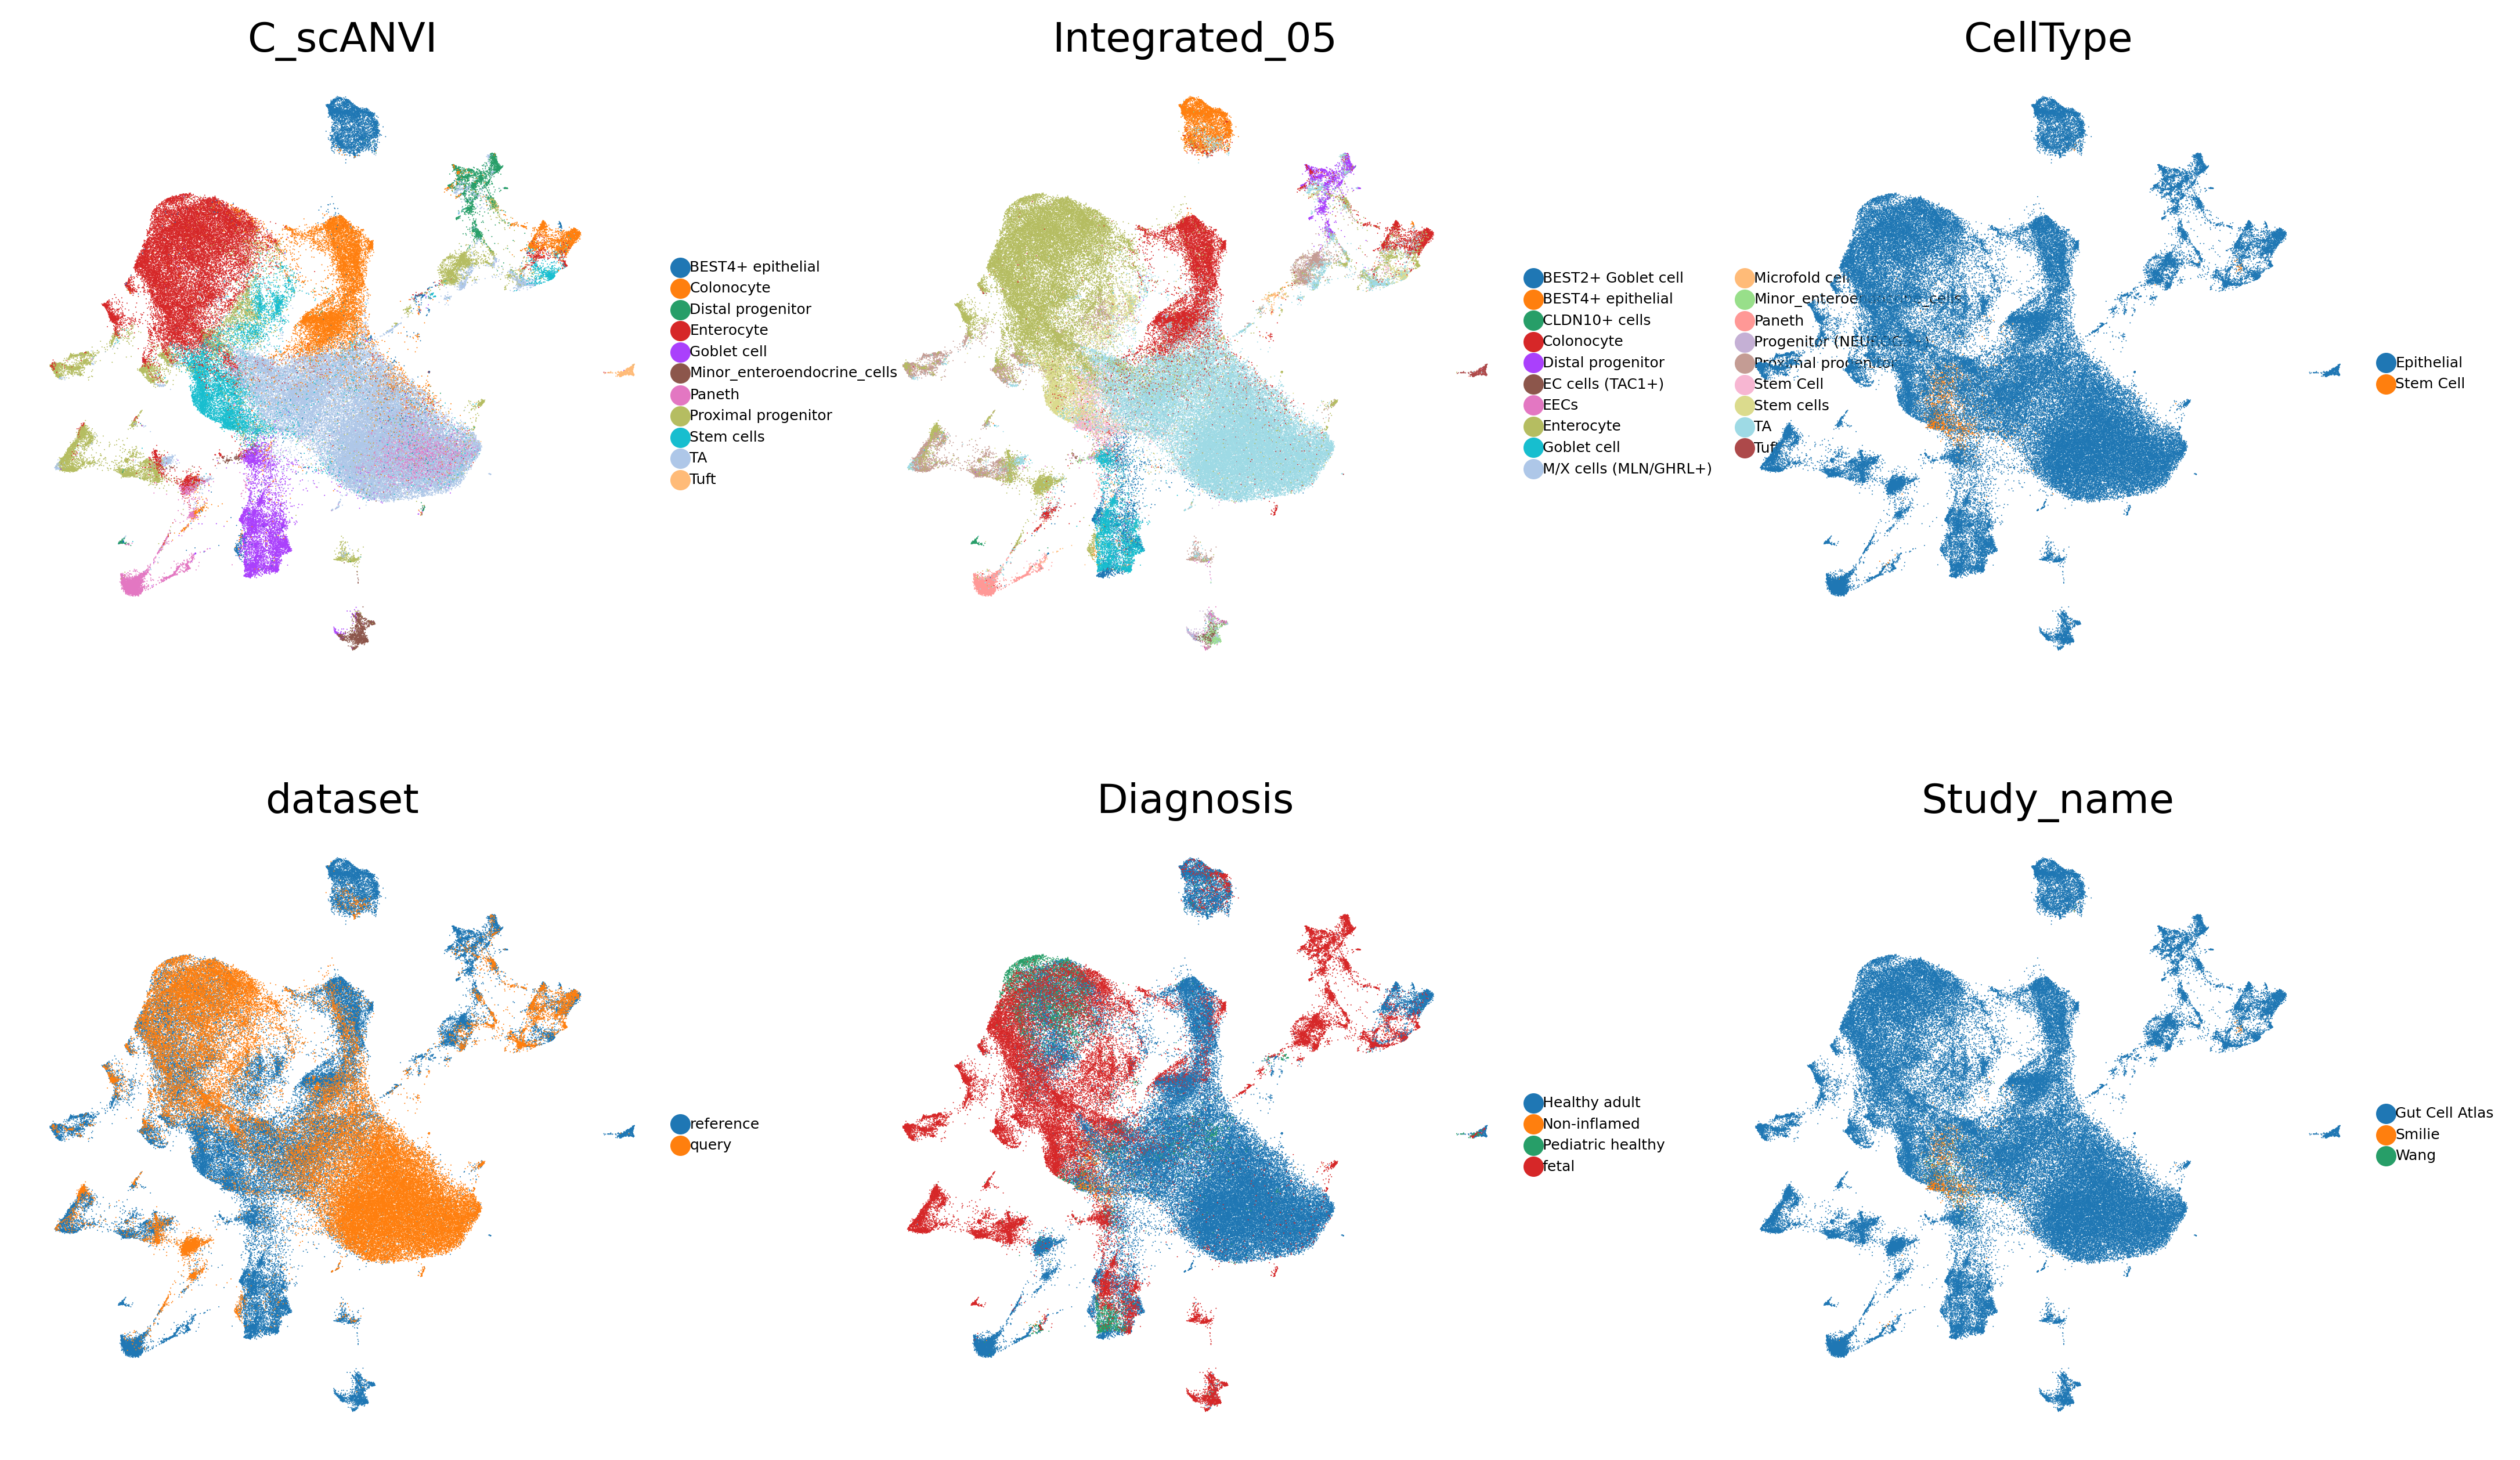

In [6]:
sc.pl.umap(adata, frameon = False, color = ['C_scANVI', 'Integrated_05', 'CellType', 'dataset', 'Diagnosis', 'Study_name'], size = 0.6, legend_fontsize = 5, ncols = 3)

In [25]:
#Write anndata object to file
adata.write_h5ad('/lustre/groups/talaveralopez/workspace/anna.maguza/Processed_datasets/expi_map/Epithelial_cells_after_scanvi.h5ad')

### Models Validation

In [5]:
input_file = '/lustre/groups/talaveralopez/workspace/anna.maguza/Processed_datasets/expi_map/Epithelial_cells_after_scanvi.h5ad'
output_file = '/lustre/groups/talaveralopez/workspace/anna.maguza/Processed_datasets/expi_map/Epithelial_cells_after_scanvi_output.h5ad'
adata = sc.read_h5ad(input_file)

In [26]:
adata.obs['C_scANVI'].value_counts()

TA                             43288
Enterocyte                     26427
Colonocyte                     15348
Proximal progenitor            12001
Stem cells                     10554
Goblet cell                     6933
Paneth                          6363
BEST4+ epithelial               5563
Distal progenitor               3621
Minor_enteroendocrine_cells     1631
Tuft                             706
Name: C_scANVI, dtype: int64

In [30]:
adata.obs['Integrated_05'].value_counts()

TA                             47700
Enterocyte                     32745
Colonocyte                     13729
Proximal progenitor             8580
Stem cells                      6909
BEST4+ epithelial               4400
Goblet cell                     3965
BEST2+ Goblet cell              2925
Paneth                          2911
Distal progenitor               2775
Stem Cell                       2508
Tuft                             688
Minor_enteroendocrine_cells      629
Microfold cell                   430
EC cells (TAC1+)                 387
EECs                             371
Progenitor (NEUROG3+)            292
M/X cells (MLN/GHRL+)            268
CLDN10+ cells                    223
Name: Integrated_05, dtype: int64

Text(0, 0.5, 'Observed')

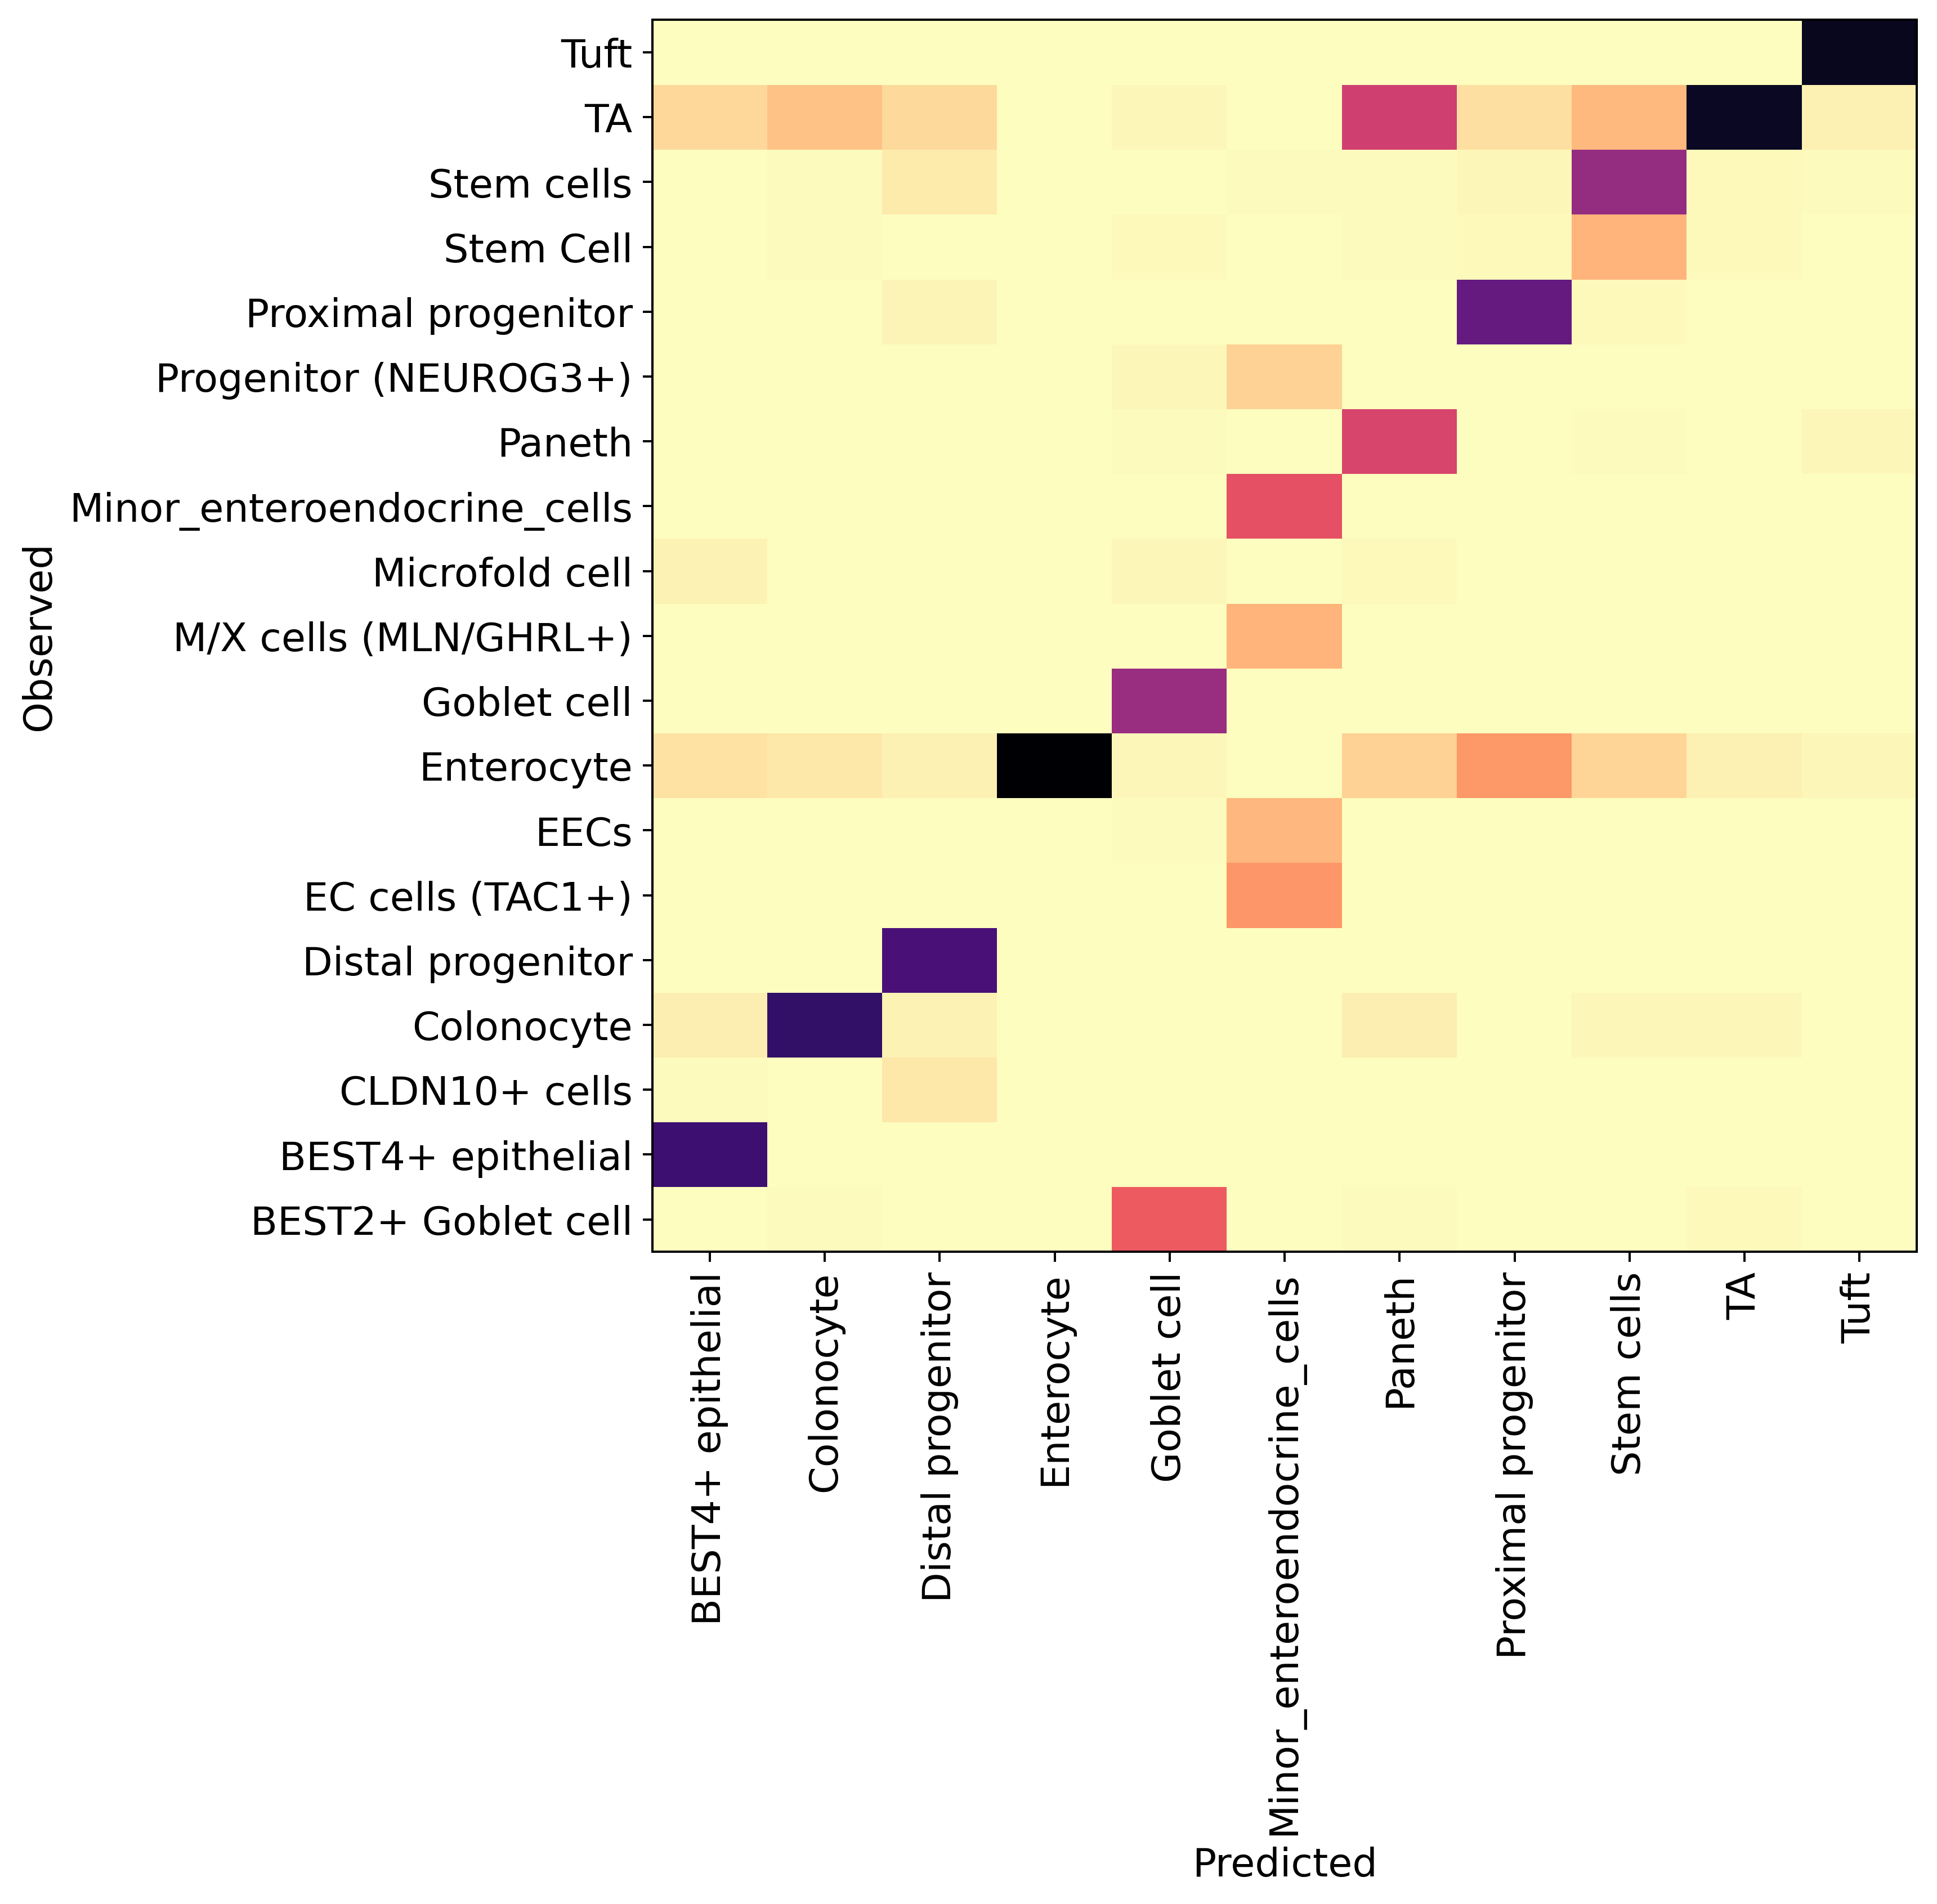

In [32]:
#Validation of the clusters
df = adata.obs.groupby(['Integrated_05', "C_scANVI"]).size().unstack(fill_value=0)
norm_df = df / df.sum(axis=0)

plt.figure(figsize=(8, 8))
_ = plt.pcolor(norm_df)
_ = plt.xticks(np.arange(0.5, len(df.columns), 1), df.columns, rotation=90)
_ = plt.yticks(np.arange(0.5, len(df.index), 1), df.index)
plt.xlabel("Predicted")
plt.ylabel("Observed")

In [7]:
#Calculate accuracy
print(f"Acc: {np.mean(adata.obs.CellType.cat.codes == adata.obs.C_scANVI.cat.codes)}")

Acc: 0.04246611545286367
